In [280]:
import pandas as pd
import numpy as np


from tqdm import tqdm, tqdm_notebook

from matplotlib import pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, zero_one_loss


%matplotlib inline

In [2]:
X, y = datasets.load_digits()["data"], datasets.load_digits()["target"]

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, shuffle = False)

### Simple KNN classifier without weights and with minkowski metric

Attention! Slow as molasses in January :-(

In [286]:
class KNeighborsClassifier():
    
    def __init__(self, k=1, q=2):
        self.k = k
        self.q = q
        self.X_train = None
        self.y_train = None
        
    def distance(self, dot1, dot2):
        return (np.sum(abs((dot1 - dot2))**self.q))**1/self.q
    
    def max_k_class(self, distance_list):
        distance_list.sort()
        
        class_list = [i[1] for i in distance_list[:self.k]]
        counts = pd.value_counts(class_list)
        return counts.idxmax()
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        print("Lazy training: OK")
    
    def predict(self, X):
        predictions = []
        
        for pred_vec in tqdm_notebook(X, desc = "main loop"):
            pred_vec_dist = []
            
            for index, train_vec in enumerate(self.X_train):
                pred_vec_dist.append((self.distance(pred_vec, train_vec), self.y_train[index]))
                
            predictions.append(self.max_k_class(pred_vec_dist))
        return predictions        

In [248]:
acc_test = []
acc_train = []
for i in np.arange(1, 30, 2):  
    knn = KNeighborsClassifier(k = i)
    knn.fit(X_train, y_train)
    acc_test.append(accuracy_score(y_test, knn.predict(X_test)))
    acc_train.append(accuracy_score(y_train, knn.predict(X_train)))

Lazy training: OK


HBox(children=(IntProgress(value=0, description='main prediction loop', max=450), HTML(value='')))

Exception in thread Thread-919:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



HBox(children=(IntProgress(value=0, description='main prediction loop', max=1347), HTML(value='')))


Lazy training: OK


HBox(children=(IntProgress(value=0, description='main prediction loop', max=450), HTML(value='')))

HBox(children=(IntProgress(value=0, description='main prediction loop', max=1347), HTML(value='')))


Lazy training: OK


HBox(children=(IntProgress(value=0, description='main prediction loop', max=450), HTML(value='')))

HBox(children=(IntProgress(value=0, description='main prediction loop', max=1347), HTML(value='')))


Lazy training: OK


HBox(children=(IntProgress(value=0, description='main prediction loop', max=450), HTML(value='')))

HBox(children=(IntProgress(value=0, description='main prediction loop', max=1347), HTML(value='')))


Lazy training: OK


HBox(children=(IntProgress(value=0, description='main prediction loop', max=450), HTML(value='')))

HBox(children=(IntProgress(value=0, description='main prediction loop', max=1347), HTML(value='')))


Lazy training: OK


HBox(children=(IntProgress(value=0, description='main prediction loop', max=450), HTML(value='')))

HBox(children=(IntProgress(value=0, description='main prediction loop', max=1347), HTML(value='')))


Lazy training: OK


HBox(children=(IntProgress(value=0, description='main prediction loop', max=450), HTML(value='')))

HBox(children=(IntProgress(value=0, description='main prediction loop', max=1347), HTML(value='')))


Lazy training: OK


HBox(children=(IntProgress(value=0, description='main prediction loop', max=450), HTML(value='')))

HBox(children=(IntProgress(value=0, description='main prediction loop', max=1347), HTML(value='')))


Lazy training: OK


HBox(children=(IntProgress(value=0, description='main prediction loop', max=450), HTML(value='')))

HBox(children=(IntProgress(value=0, description='main prediction loop', max=1347), HTML(value='')))


Lazy training: OK


HBox(children=(IntProgress(value=0, description='main prediction loop', max=450), HTML(value='')))

HBox(children=(IntProgress(value=0, description='main prediction loop', max=1347), HTML(value='')))


Lazy training: OK


HBox(children=(IntProgress(value=0, description='main prediction loop', max=450), HTML(value='')))

HBox(children=(IntProgress(value=0, description='main prediction loop', max=1347), HTML(value='')))


Lazy training: OK


HBox(children=(IntProgress(value=0, description='main prediction loop', max=450), HTML(value='')))

HBox(children=(IntProgress(value=0, description='main prediction loop', max=1347), HTML(value='')))


Lazy training: OK


HBox(children=(IntProgress(value=0, description='main prediction loop', max=450), HTML(value='')))

HBox(children=(IntProgress(value=0, description='main prediction loop', max=1347), HTML(value='')))


Lazy training: OK


HBox(children=(IntProgress(value=0, description='main prediction loop', max=450), HTML(value='')))

HBox(children=(IntProgress(value=0, description='main prediction loop', max=1347), HTML(value='')))


Lazy training: OK


HBox(children=(IntProgress(value=0, description='main prediction loop', max=450), HTML(value='')))

HBox(children=(IntProgress(value=0, description='main prediction loop', max=1347), HTML(value='')))

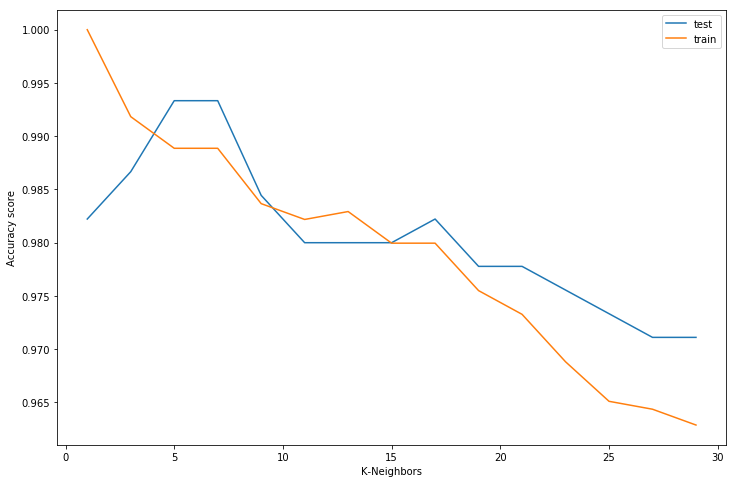

In [270]:
plt.figure(figsize = (12, 8))
plt.plot(np.arange(1, 30, 2), acc_test, label = "test")
plt.plot(np.arange(1, 30, 2), acc_train, label = "train")
plt.xlabel("K-Neighbors")
plt.ylabel("Accuracy score")
plt.legend()